![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [86]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#Import dataset
female_match=pd.read_csv('women_results.csv')
male_match=pd.read_csv('men_results.csv')

# Step 2: Data Preprocessing (if necessary)
# Clean and preprocess the data as needed. Ensure consistency in formatting and variables between women_data and men_data


#Filtering for FIFA matches
female_match=female_match[female_match.tournament=='FIFA World Cup']
male_match=male_match[male_match.tournament=='FIFA World Cup']

#Converting date format
female_match["date"] = pd.to_datetime(female_match["date"])
male_match["date"] = pd.to_datetime(male_match["date"])

#Filtering matches since 2002-01-01
female_match=female_match[female_match.date>'2002-01-01']
male_match=male_match[male_match.date>'2002-01-01']

#Create a metric Total score
female_match['total_score']=female_match.home_score+female_match.away_score
male_match['total_score']=male_match.home_score+male_match.away_score


#### Step 3: Hypothesis Formulation

**1)Determining the type of hypothesis test:**

-Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.

-An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.

-To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.

**2)Determining if the data is normally distributed:**

-The normal distribution is a symmetric bell-shaped curve, with the distribution centered around the mean.

-Plotting a histogram displaying the distribution of the number of goals scored in men's and women's matches will give you an idea about whether the dataset is normally distributed or not.

-If the normality is unclear from the plot, you can run a test of normality, such as a Kolmogorov–Smirnov test or the Shapiro–Wilk test.


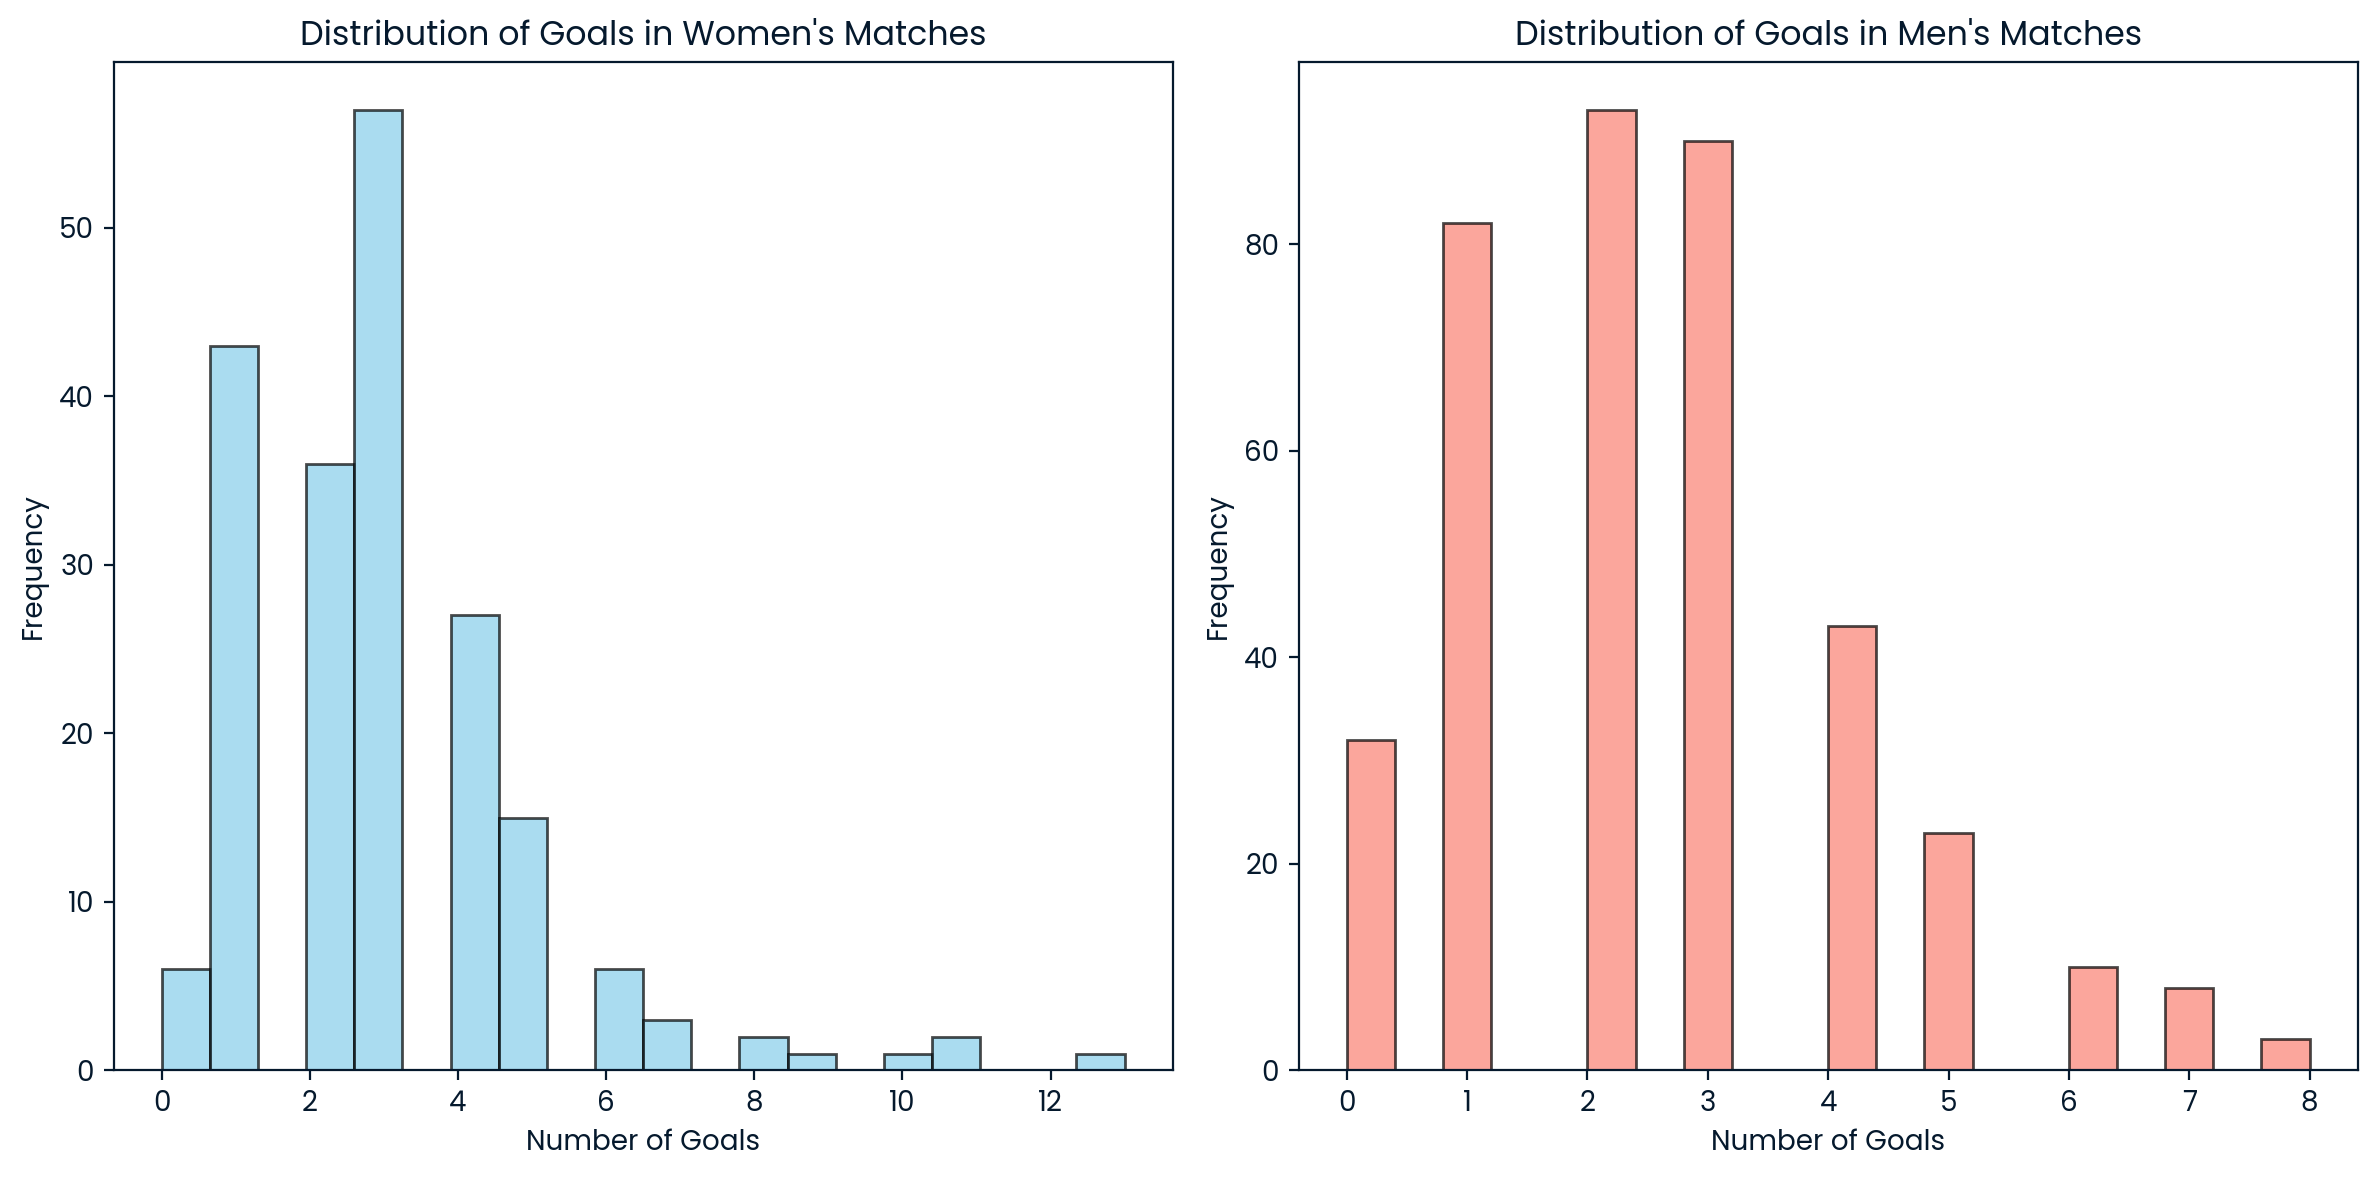

In [87]:
# Plot histograms of the number of goals scored in men's and women's matches
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(female_match['total_score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Goals in Women\'s Matches')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(male_match['total_score'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribution of Goals in Men\'s Matches')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
# Perform Shapiro-Wilk test for normality
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
# Null hypothesis: Data is normally distributed
# Alternative hypothesis: Data is not normally distributed
women_stat, women_p_value = shapiro(female_match['total_score'])
men_stat, men_p_value = shapiro(male_match['total_score'])
# Print p-values from Shapiro-Wilk test
print("Shapiro-Wilk Test p-value for Women's Matches:", women_p_value)
print("Shapiro-Wilk Test p-value for Men's Matches:", men_p_value)

Shapiro-Wilk Test p-value for Women's Matches: 3.8905201759850683e-13
Shapiro-Wilk Test p-value for Men's Matches: 8.894154401688226e-13


Since both p-values are much smaller than the significance level of 0.1, we reject the null hypothesis that the data is normally distributed. This suggests that the assumption of normality is violated for both women's and men's matches data.

Given the violation of the normality assumption, we should consider using non-parametric tests such as the Wilcoxon-Mann-Whitney test to compare the mean number of goals scored in women's and men's matches. 

In [89]:
# Perform Wilcoxon-Mann-Whitney test
# Null hypothesis: The distributions of goals scored in women's and men's matches are the same
# Alternative hypothesis: The distributions of goals scored in women's and men's matches are different

# Perform Mann-Whitney U test
statistic, p_val = mannwhitneyu(female_match["total_score"], male_match["total_score"], alternative='greater')

# Define significance level
alpha = 0.1

# Interpret results
if p_val < alpha:
    result = 'reject'  
else:
    result = 'fail to reject' 


# Store results
result_dict = {
    'p_val': p_val,
    'result': result
}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
